<a href="https://colab.research.google.com/github/emilycalvert/scripts_cite/blob/main/visualizaciones_censo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Subir Datos

Calidad de Fuste (CF)
- '1'= cylindrico y sano
- '2'= defectos pero aprovechable
- '3'= hueco y muerto- no aprovechable

In [2]:
df= pd.read_csv("censo_aprovechamiento.csv", sep= ',', encoding='utf-8')

In [3]:
df.head()

,N°,PC,Nro Arbol,Faja,Especie,Dap,HC,HT,CF,VOL M3,ESTE,NORTE,Condicion,Obs,COD_cond,COD_sp1,COD_sp2,COD_GPS
0,1,1,1,1,Cumala llorona,65,16,20,1,3.451,675753.0,9630643.0,Aprovechable,NaN,NaN,Cuma,ll,Cuma ll_1/1
1,2,1,2,1,Almendro,110,14,19,2,8.648,675804.0,9630662.0,Aprovechable,NaN,NaN,Alme,NaN,Alme_1/2
2,3,1,3,1,Mari mari,47,13,19,2,1.466,675811.0,9630667.0,Aprovechable,NaN,NaN,Mari,ma,Mari ma_1/3
3,4,1,4,1,Azucar huayo,65,16,21,1,3.451,675729.0,9630714.0,Aprovechable,NaN,NaN,Azuc,hu,Azuc hu_1/4
4,5,1,5,1,Huayruro,66,13,18,1,2.891,675771.0,9630741.0,Aprovechable,NaN,NaN,Huay,NaN,Huay_1/5


In [4]:
for column in df.columns:
    print(column)

N°
PC
Nro Arbol
Faja
Especie
Dap 
HC
HT
CF
VOL M3
ESTE
NORTE
Condicion
Obs
COD_cond
COD_sp1
COD_sp2
COD_GPS


# Limpiar Datos

In [ ]:
# removar espacios en nombre de columno
df.columns = df.columns.str.strip()

In [ ]:
# dejar columnos que no me interesa
df.drop(['N°', 'PC', 'Nro Arbol', 'Faja', 'COD_cond', 'COD_sp1', 'COD_sp2', 'COD_GPS'], axis=1, inplace=True)

In [ ]:
# valores unico pa condicion y observacion
print(df['Condicion'].unique())
print(df['Obs'].unique())

['Aprovechable' 'Semillero']
[nan 'Cumala blanca' 'Cumala caupuri' 'Panguana' 'Machimango blanco']


In [ ]:
# dejar observacion
df.drop(['Obs'], axis=1, inplace=True)

In [ ]:
# chequear dtypes y null valores
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765 entries, 0 to 3764
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Especie    3765 non-null   object 
 1   Dap        3765 non-null   int64  
 2   HC         3765 non-null   int64  
 3   HT         3765 non-null   int64  
 4   CF         3765 non-null   int64  
 5   VOL M3     3765 non-null   float64
 6   ESTE       3765 non-null   float64
 7   NORTE      3765 non-null   float64
 8   Condicion  3765 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 264.9+ KB


In [ ]:
# condicion verdad o falso
df['Condicion'] = df['Condicion'] == 'Aprovechable'
# especies a datos categorical- calidad de fuste tambien
df['Especie'] = df['Especie'].astype('category')
df['CF'] = df['CF'].astype('category')
# el resto como float
for column in ['Dap', 'HC', 'HT', 'VOL M3']:
    df[column] = df[column].astype(float)

In [ ]:
# seperar las muestras aprovechables de no
group1 = df[(df['Condicion']) & (df['CF'].isin([1, 2]))]
group2 = df[~((df['Condicion']) & (df['CF'].isin([1, 2])))]
columns_to_check = ['HC', 'HT', 'Dap', 'VOL M3']

In [ ]:
# ver valores atipicos pa inferar que no son reales
def print_outlier_details(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifying outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

        # Printing details of each outlier
        for index, value in outliers.items():
            print(f"Outlier in {column}, Index: {index}, Value: {value}")
print("# Aprovechable Outliers in Group 1:")
print_outlier_details(group1, columns_to_check)
print("# Outliers in Group 2:")
print_outlier_details(group2, columns_to_check)

# Aprovechable Outliers in Group 1:
Outlier in HC, Index: 636, Value: 25.0
Outlier in HC, Index: 1530, Value: 25.0
Outlier in HC, Index: 1868, Value: 7.0
Outlier in HC, Index: 2003, Value: 7.0
Outlier in HC, Index: 2011, Value: 6.0
Outlier in HC, Index: 2420, Value: 7.0
Outlier in HC, Index: 2432, Value: 7.0
Outlier in HC, Index: 2983, Value: 7.0
Outlier in HC, Index: 3032, Value: 6.0
Outlier in HC, Index: 3203, Value: 7.0
Outlier in HT, Index: 281, Value: 27.0
Outlier in HT, Index: 287, Value: 27.0
Outlier in HT, Index: 309, Value: 27.0
Outlier in HT, Index: 313, Value: 27.0
Outlier in HT, Index: 339, Value: 27.0
Outlier in HT, Index: 352, Value: 29.0
Outlier in HT, Index: 407, Value: 14.0
Outlier in HT, Index: 536, Value: 28.0
Outlier in HT, Index: 563, Value: 28.0
Outlier in HT, Index: 571, Value: 27.0
Outlier in HT, Index: 621, Value: 28.0
Outlier in HT, Index: 622, Value: 27.0
Outlier in HT, Index: 626, Value: 28.0
Outlier in HT, Index: 636, Value: 28.0
Outlier in HT, Index: 1075,

In [ ]:
df.loc[df['HT'] > 200, 'HT'] = np.nan
df.loc[df['HT'] > 200, 'HT'] = 23

# Explorar Datos

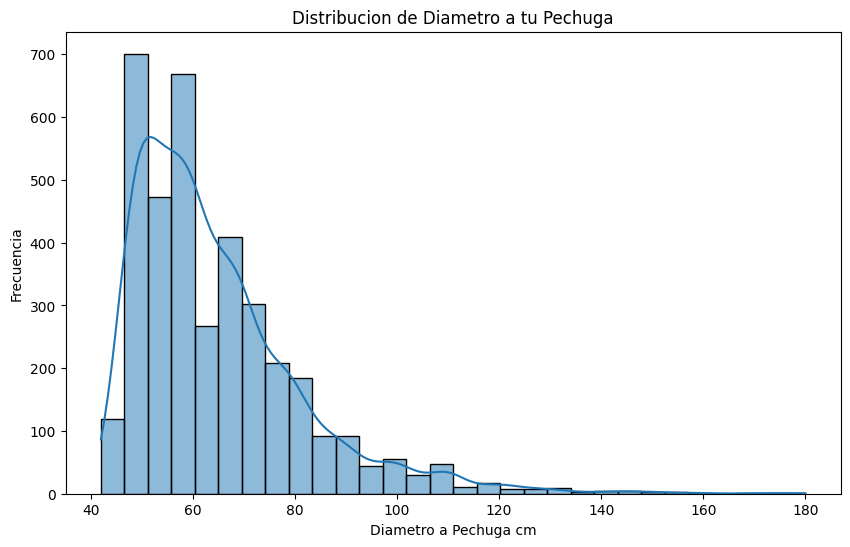

In [ ]:
# @title
plt.figure(figsize=(10, 6))
sns.histplot(df['Dap'], bins=30, kde=True)
plt.title('Distribucion de Diametro a tu Pechuga')
plt.xlabel('Diametro a Pechuga cm')
plt.ylabel('Frecuencia')
plt.show()

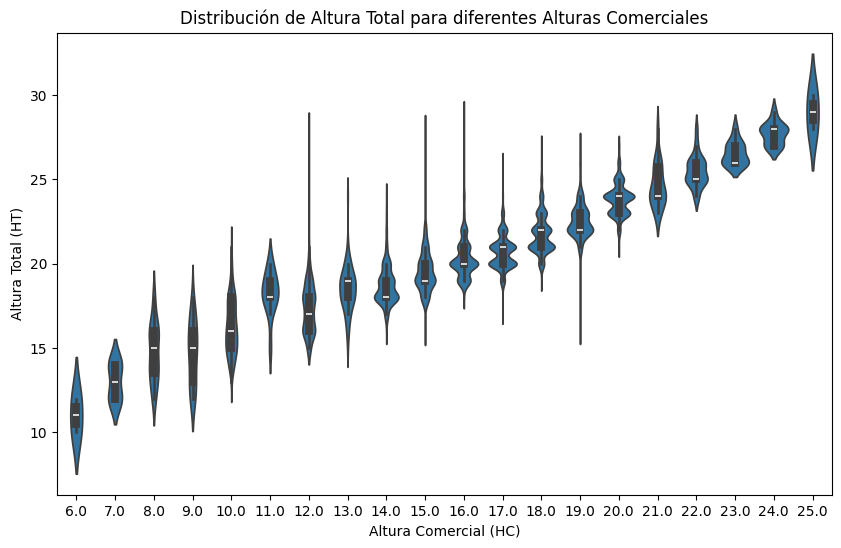

In [ ]:
# @title
plt.figure(figsize=(10, 6))
sns.violinplot(x='HC', y='HT', data=df)
plt.title('Distribución de Altura Total para diferentes Alturas Comerciales')
plt.xlabel('Altura Comercial (HC)')
plt.ylabel('Altura Total (HT)')
plt.show()

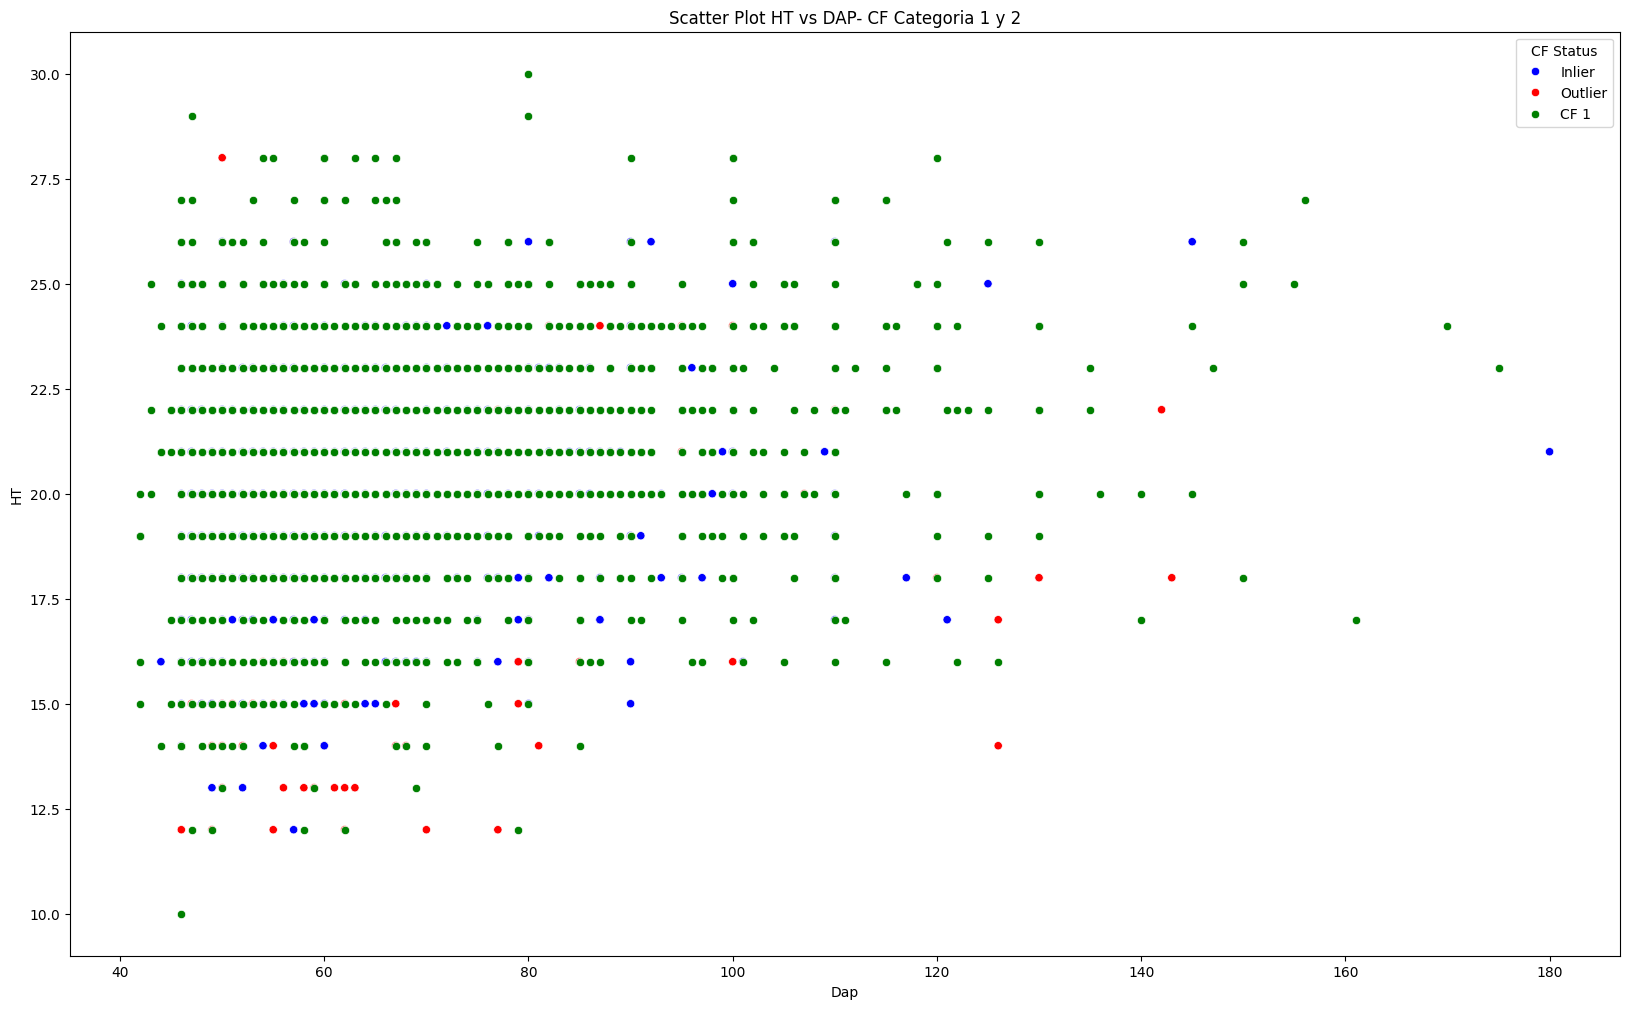

In [ ]:
# @title
def detect_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    return (group < (Q1 - 1.5 * IQR)) | (group > (Q3 + 1.5 * IQR))

df['Dap_Outlier'] = df.groupby('Especie')['Dap'].transform(detect_outliers)
df['HT_Outlier'] = df.groupby('Especie')['HT'].transform(detect_outliers)

df['Color'] = 'Inlier'
df.loc[(df['CF'] == 2) & (df['Dap_Outlier'] | df['HT_Outlier']), 'Color'] = 'Outlier'

plt.figure(figsize=(20, 12))
sns.scatterplot(x='Dap', y='HT', hue='Color',
                data=df[df['CF'] == 2],
                palette={'Inlier': 'blue', 'Outlier': 'red'})

sns.scatterplot(x='Dap', y='HT',
                data=df[df['CF'] == 1],
                color='green', label='CF 1')

plt.title('Scatter Plot HT vs DAP- CF Categoria 1 y 2')
plt.xlabel('Dap')
plt.ylabel('HT')
plt.legend(title='CF Status')
plt.show()

#### Los Histograms representan el patron de distribucion y los puntos son los valores.

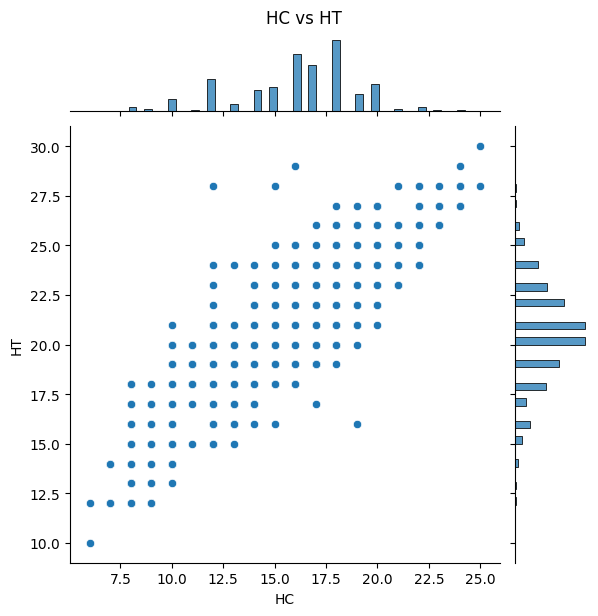

In [ ]:
# @title
sns.jointplot(x='HC', y='HT', data=df, kind="scatter")
plt.suptitle('HC vs HT', y=1.02)
plt.xlabel('HC')
plt.ylabel('HT')
plt.show()

#### A visualizar los datos proximos necesitamos a normalizar a contar para la variacion en espieces.

<ipython-input-122-0b422876aa73>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  species_means = df.groupby(['Especie', 'Condicion']).mean().reset_index()
<ipython-input-122-0b422876aa73>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Dap', y='HT', hue='Condicion', data=species_means, palette='coolwarm', ci=None)


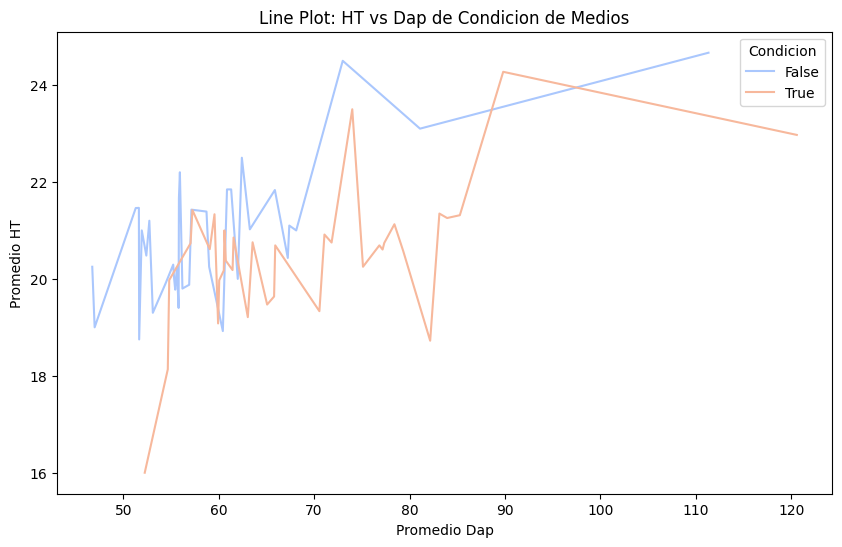

In [ ]:
# @title
species_means = df.groupby(['Especie', 'Condicion']).mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Dap', y='HT', hue='Condicion', data=species_means, palette='coolwarm', ci=None)
plt.title('Line Plot: HT vs Dap de Condicion de Medios')
plt.xlabel('Promedio Dap')
plt.ylabel('Promedio HT')
plt.legend(title='Condicion')
plt.show()

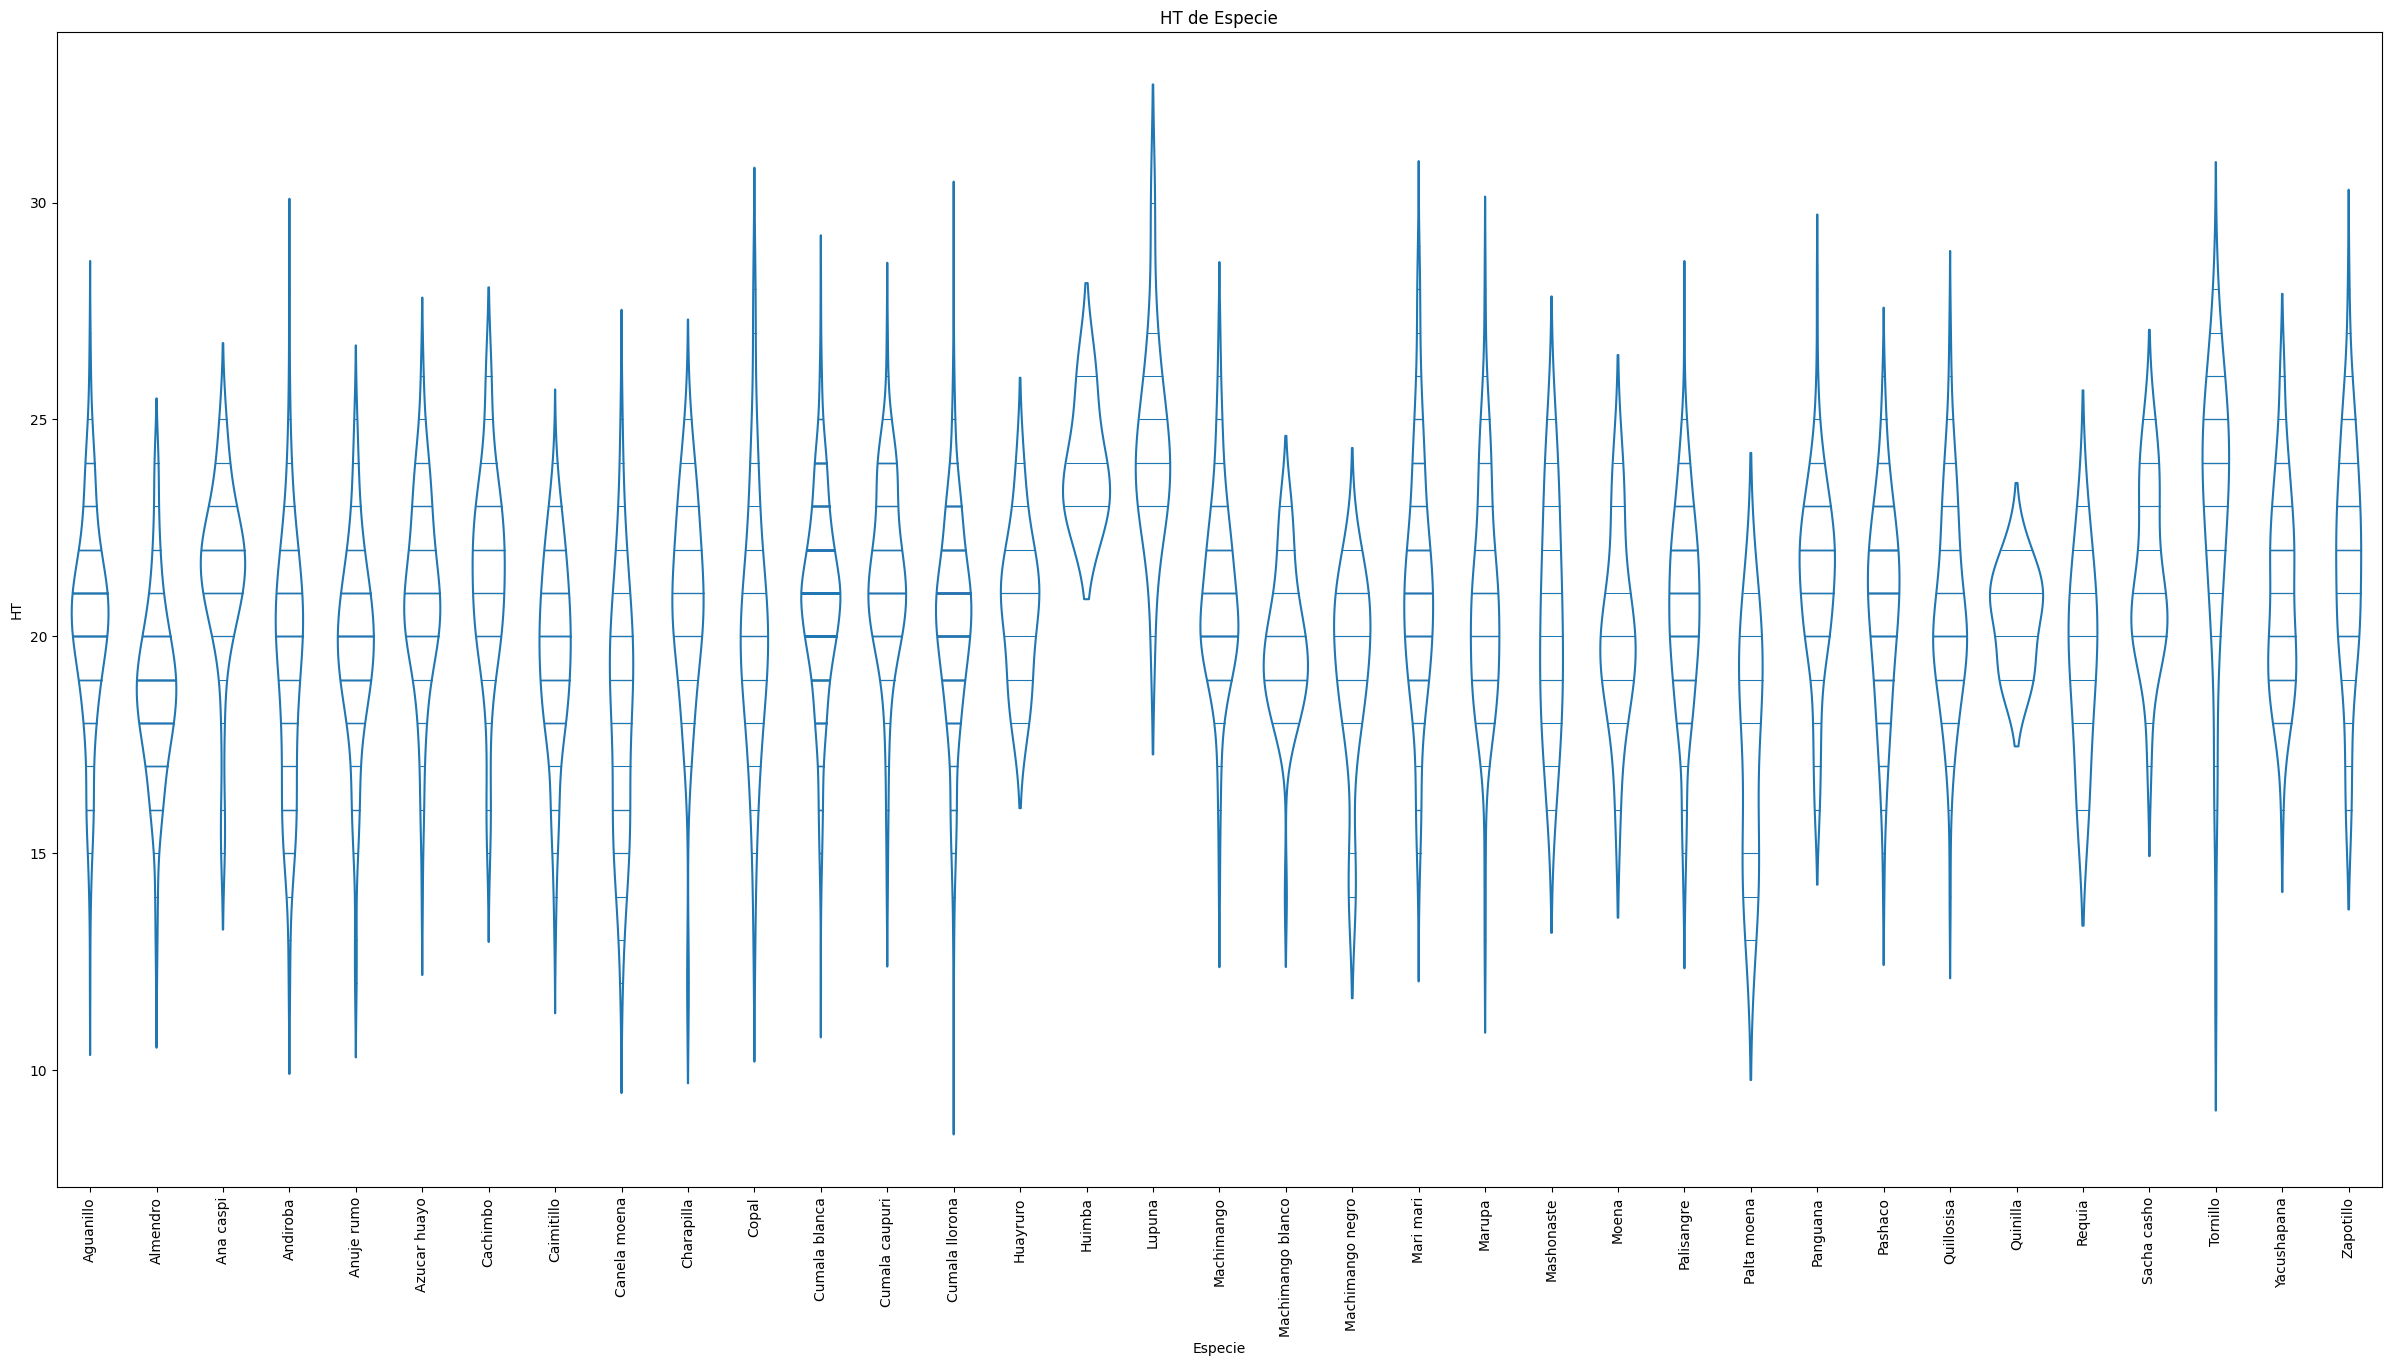

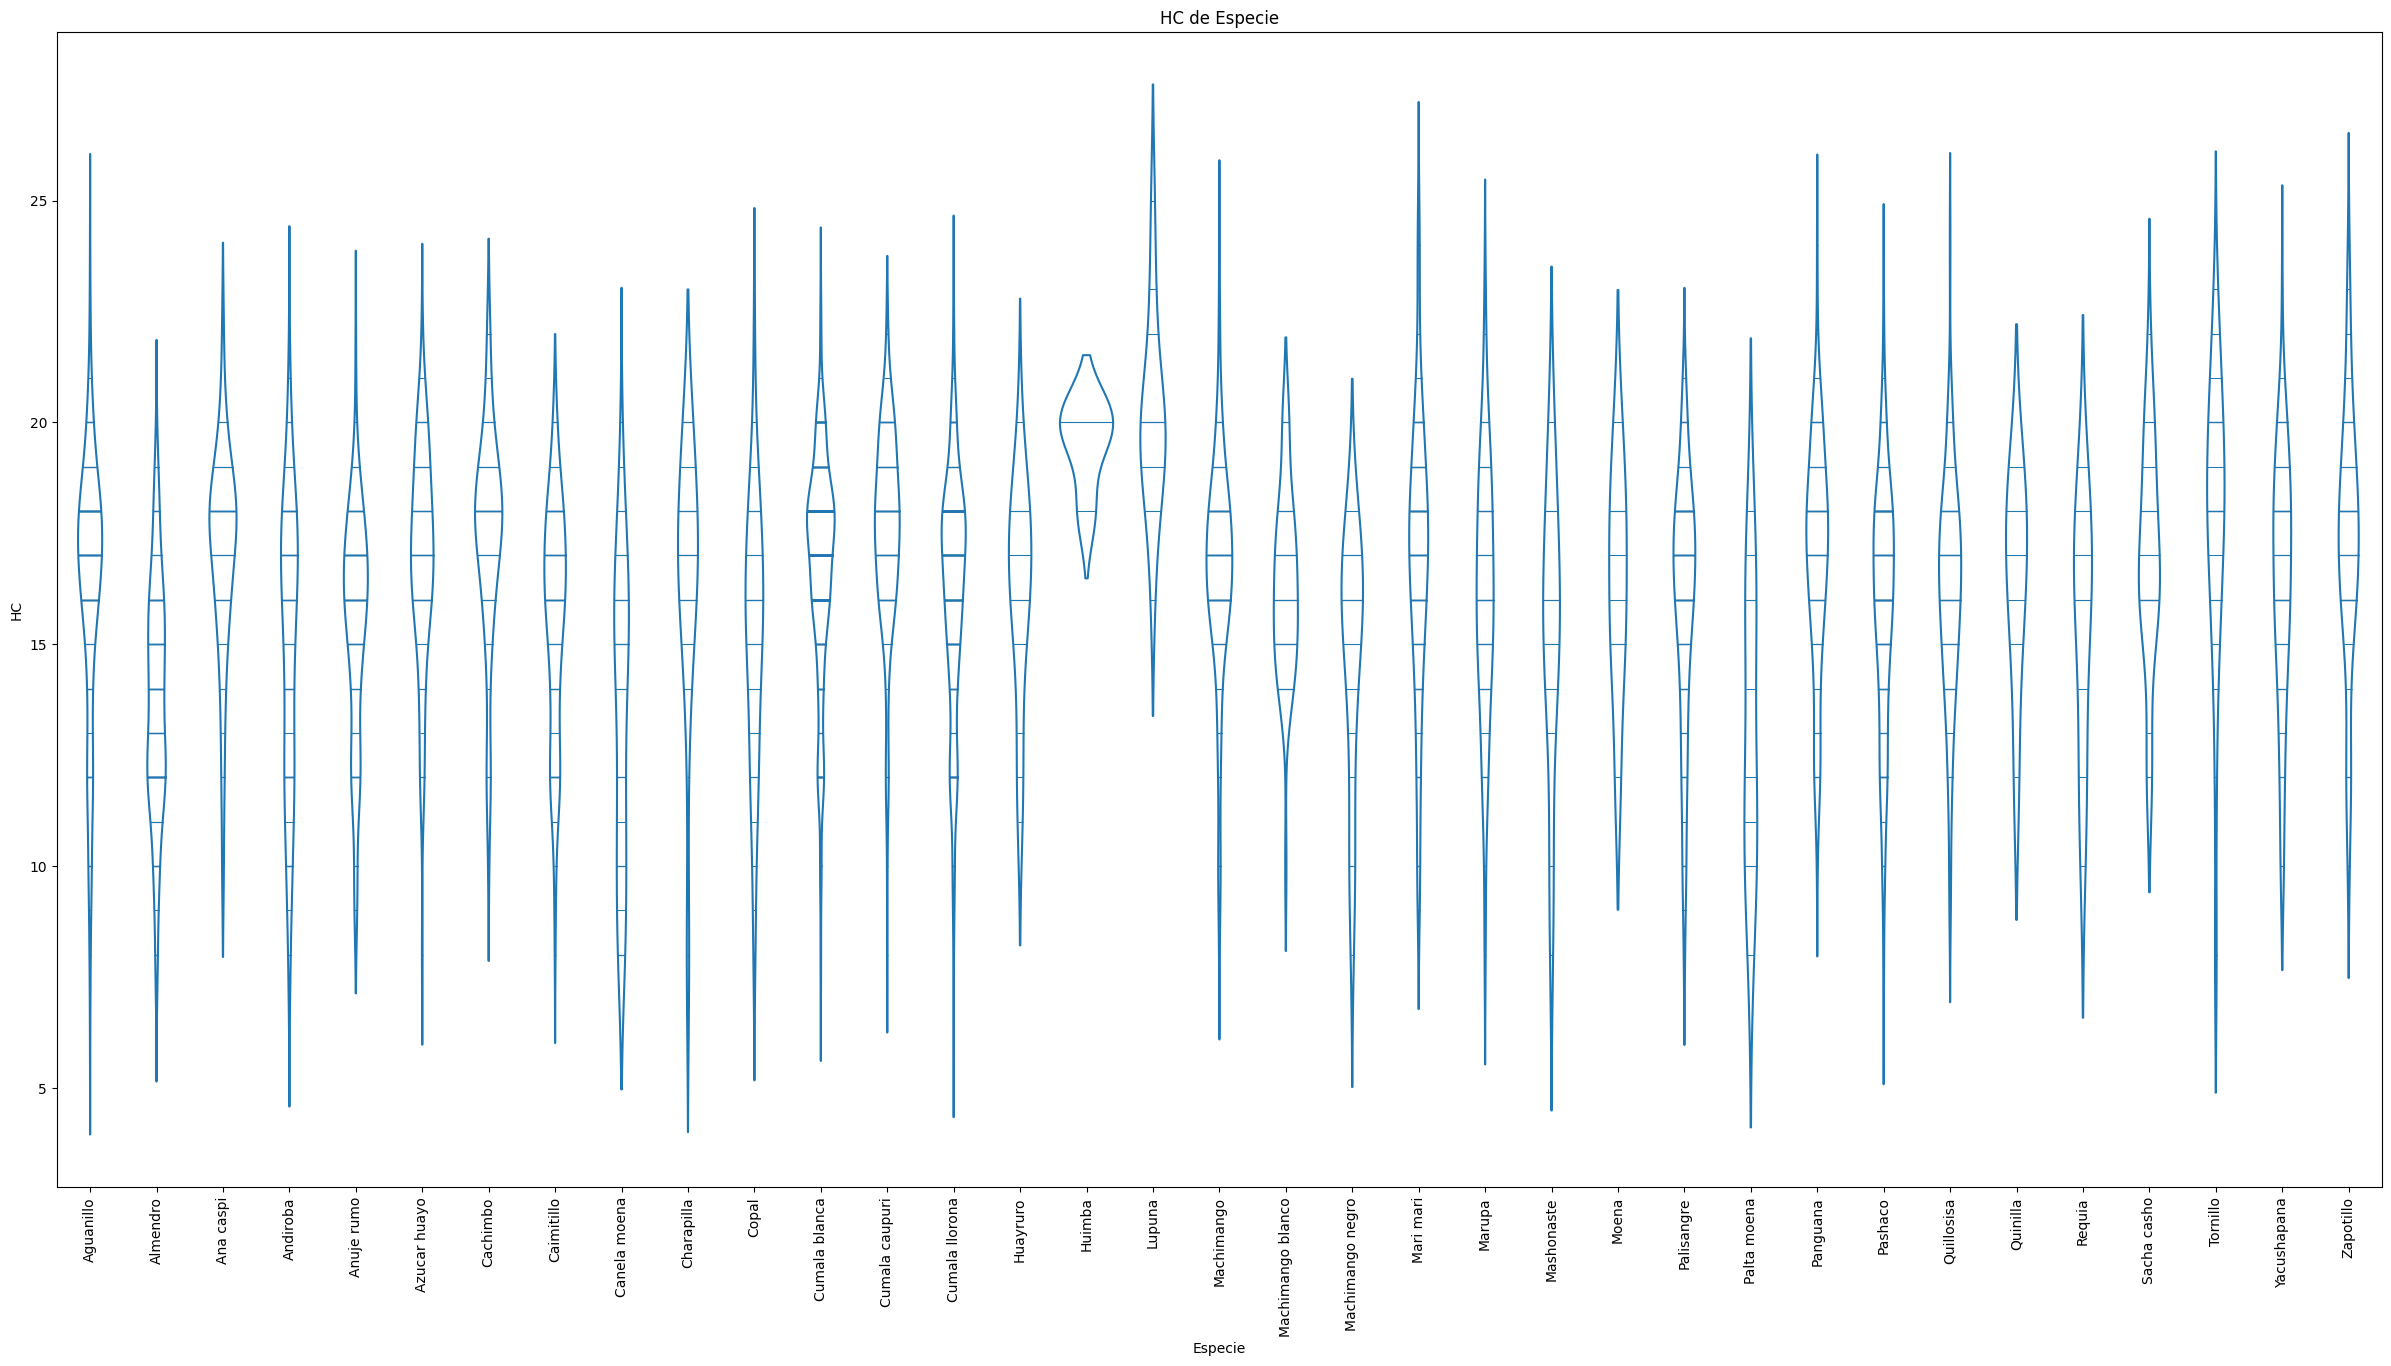

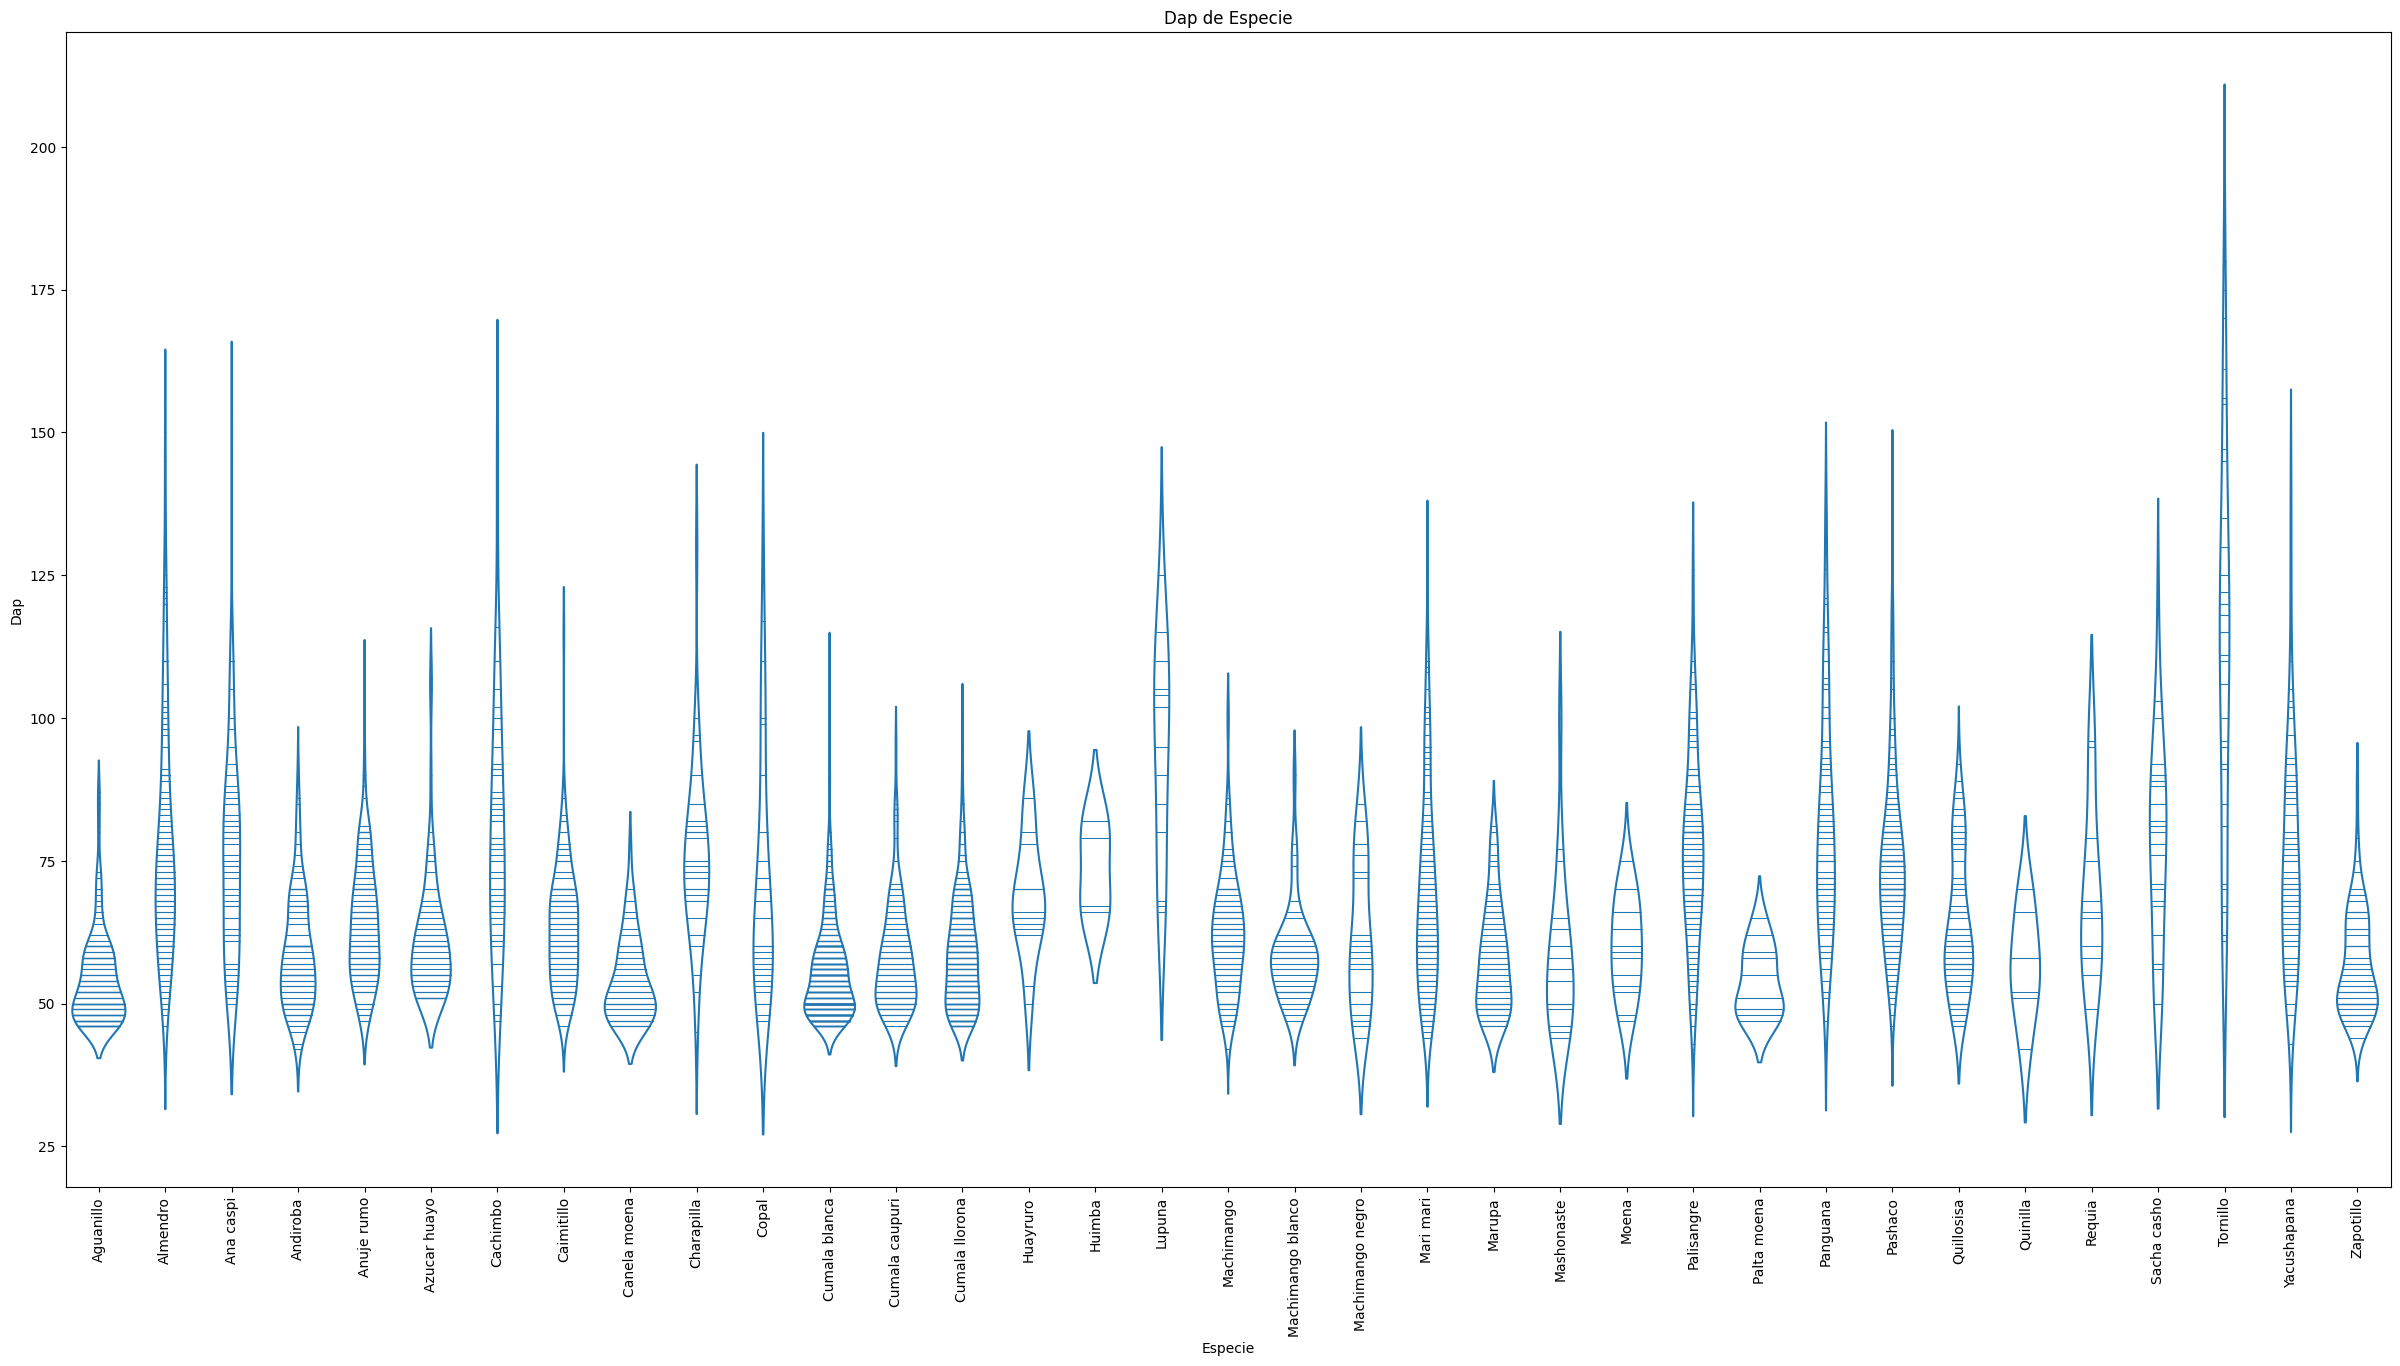

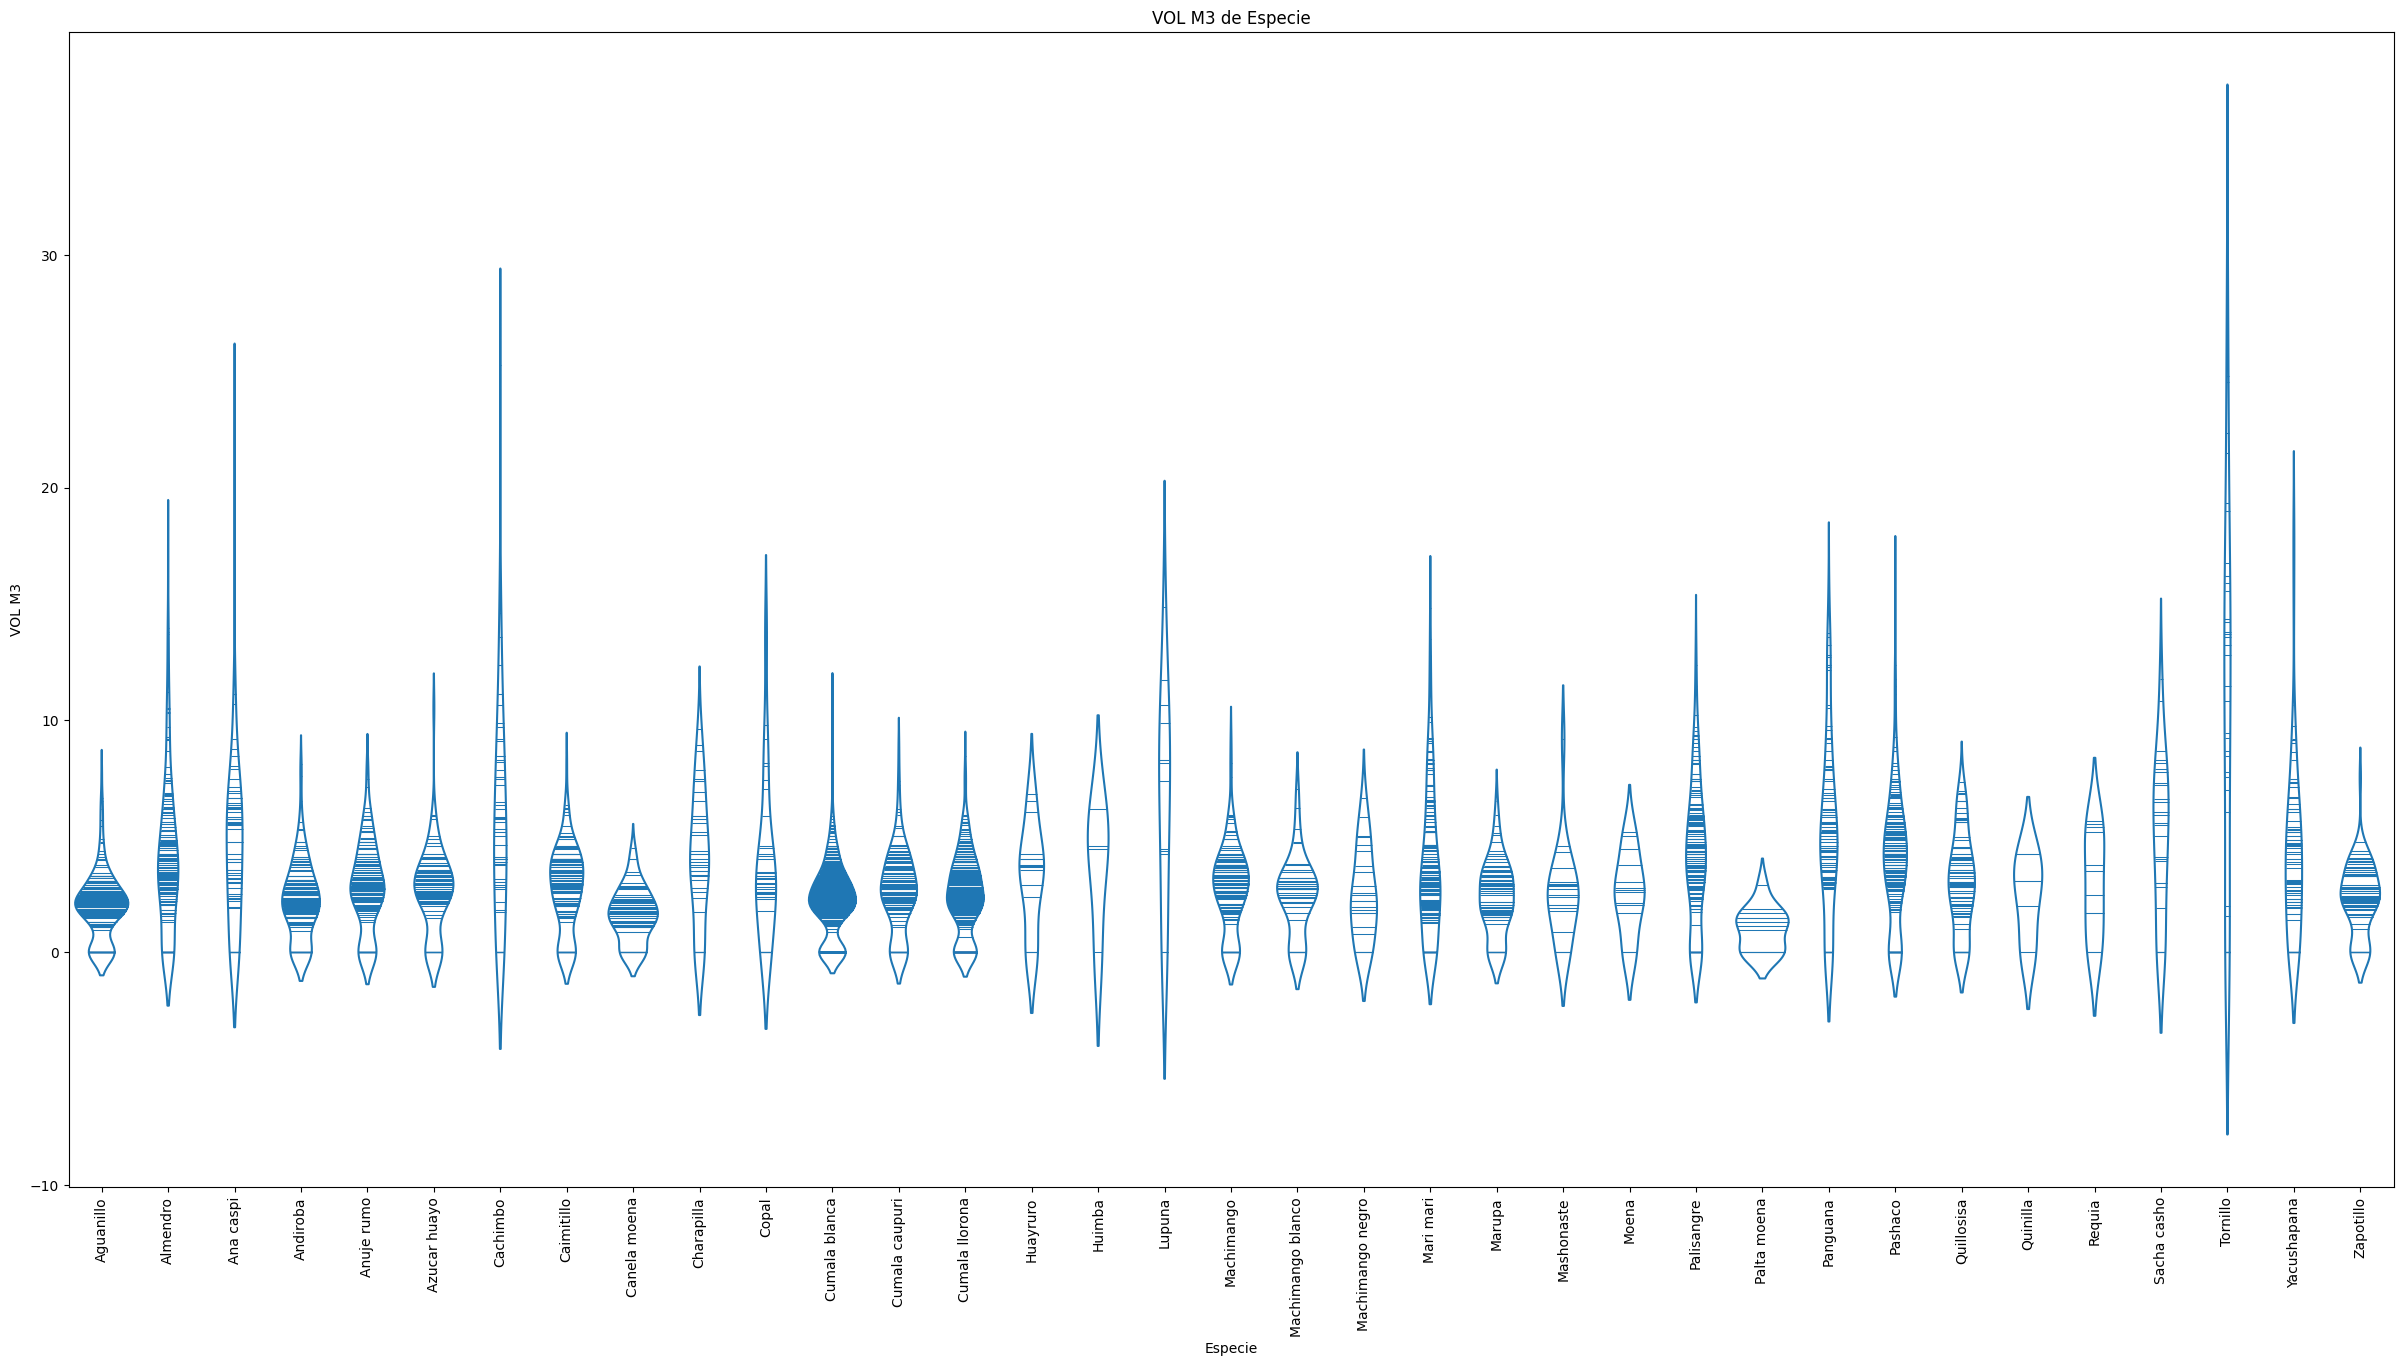

In [ ]:
# @title
variables_to_plot = ['HT', 'HC', 'Dap', 'VOL M3']

for variable in variables_to_plot:
    plt.figure(figsize=(30, 15))
    sns.violinplot(x='Especie', y=variable, data=df, fill=False, inner='stick')
    plt.title(f'{variable} de Especie')
    plt.xlabel('Especie')
    plt.ylabel(variable)
    plt.xticks(rotation=90)
    plt.show()